In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./winequality-red.csv', sep=';')
print(
    f"Wine quality ratings distribution:\n{df['quality'].value_counts().sort_index()}\n"
)
print(f"Missing values in each column:\n{df.isna().sum()}")

Wine quality ratings distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


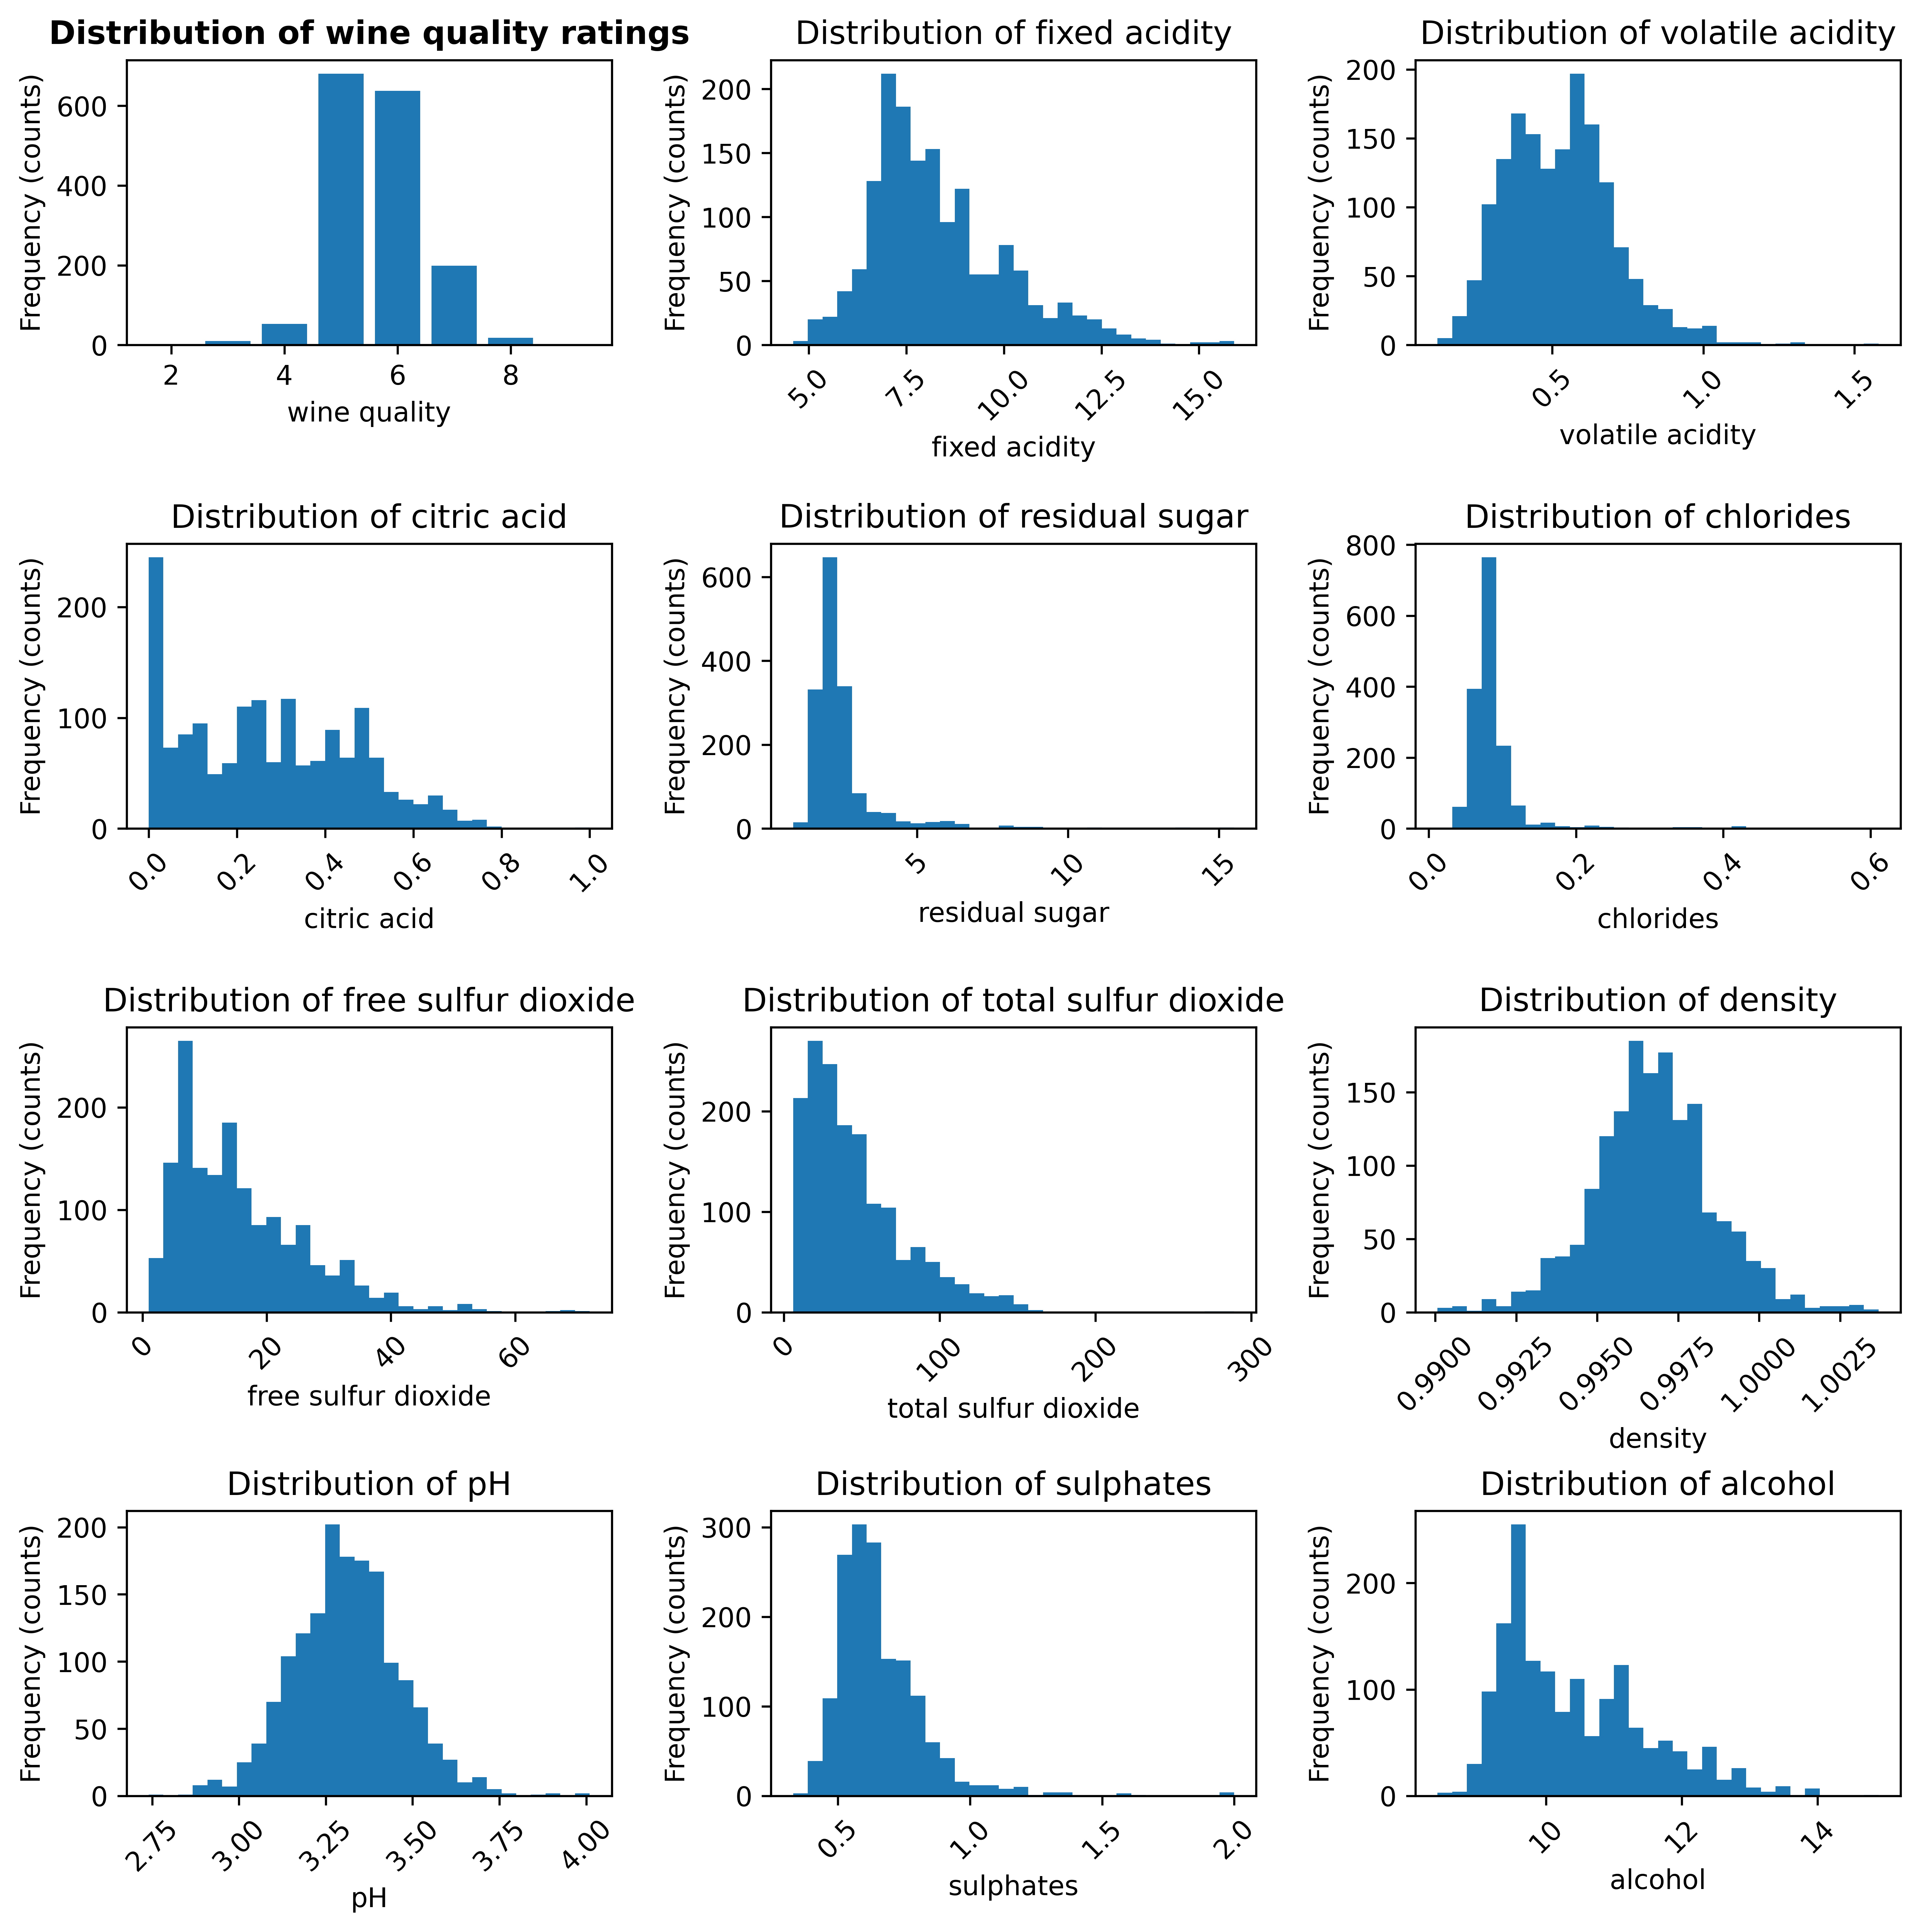

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10), dpi=600)
axes = axes.flatten()
for i, column in enumerate(df.columns[:-1]):
    axes[i + 1].hist(df[column], bins=30)
    axes[i + 1].set_title(f'Distribution of {column}')
    axes[i + 1].set_xlabel(column)
    axes[i + 1].set_ylabel('Frequency (counts)')
    axes[i + 1].tick_params(axis='x', rotation=45)

ax = axes[0]
ax.hist(df['quality'], bins=range(2, 11), align='left', rwidth=0.8)
ax.set_xlabel('wine quality')
ax.set_ylabel('Frequency (counts)')
ax.set_title('Distribution of wine quality ratings', fontweight='bold')

plt.tight_layout()
plt.show()

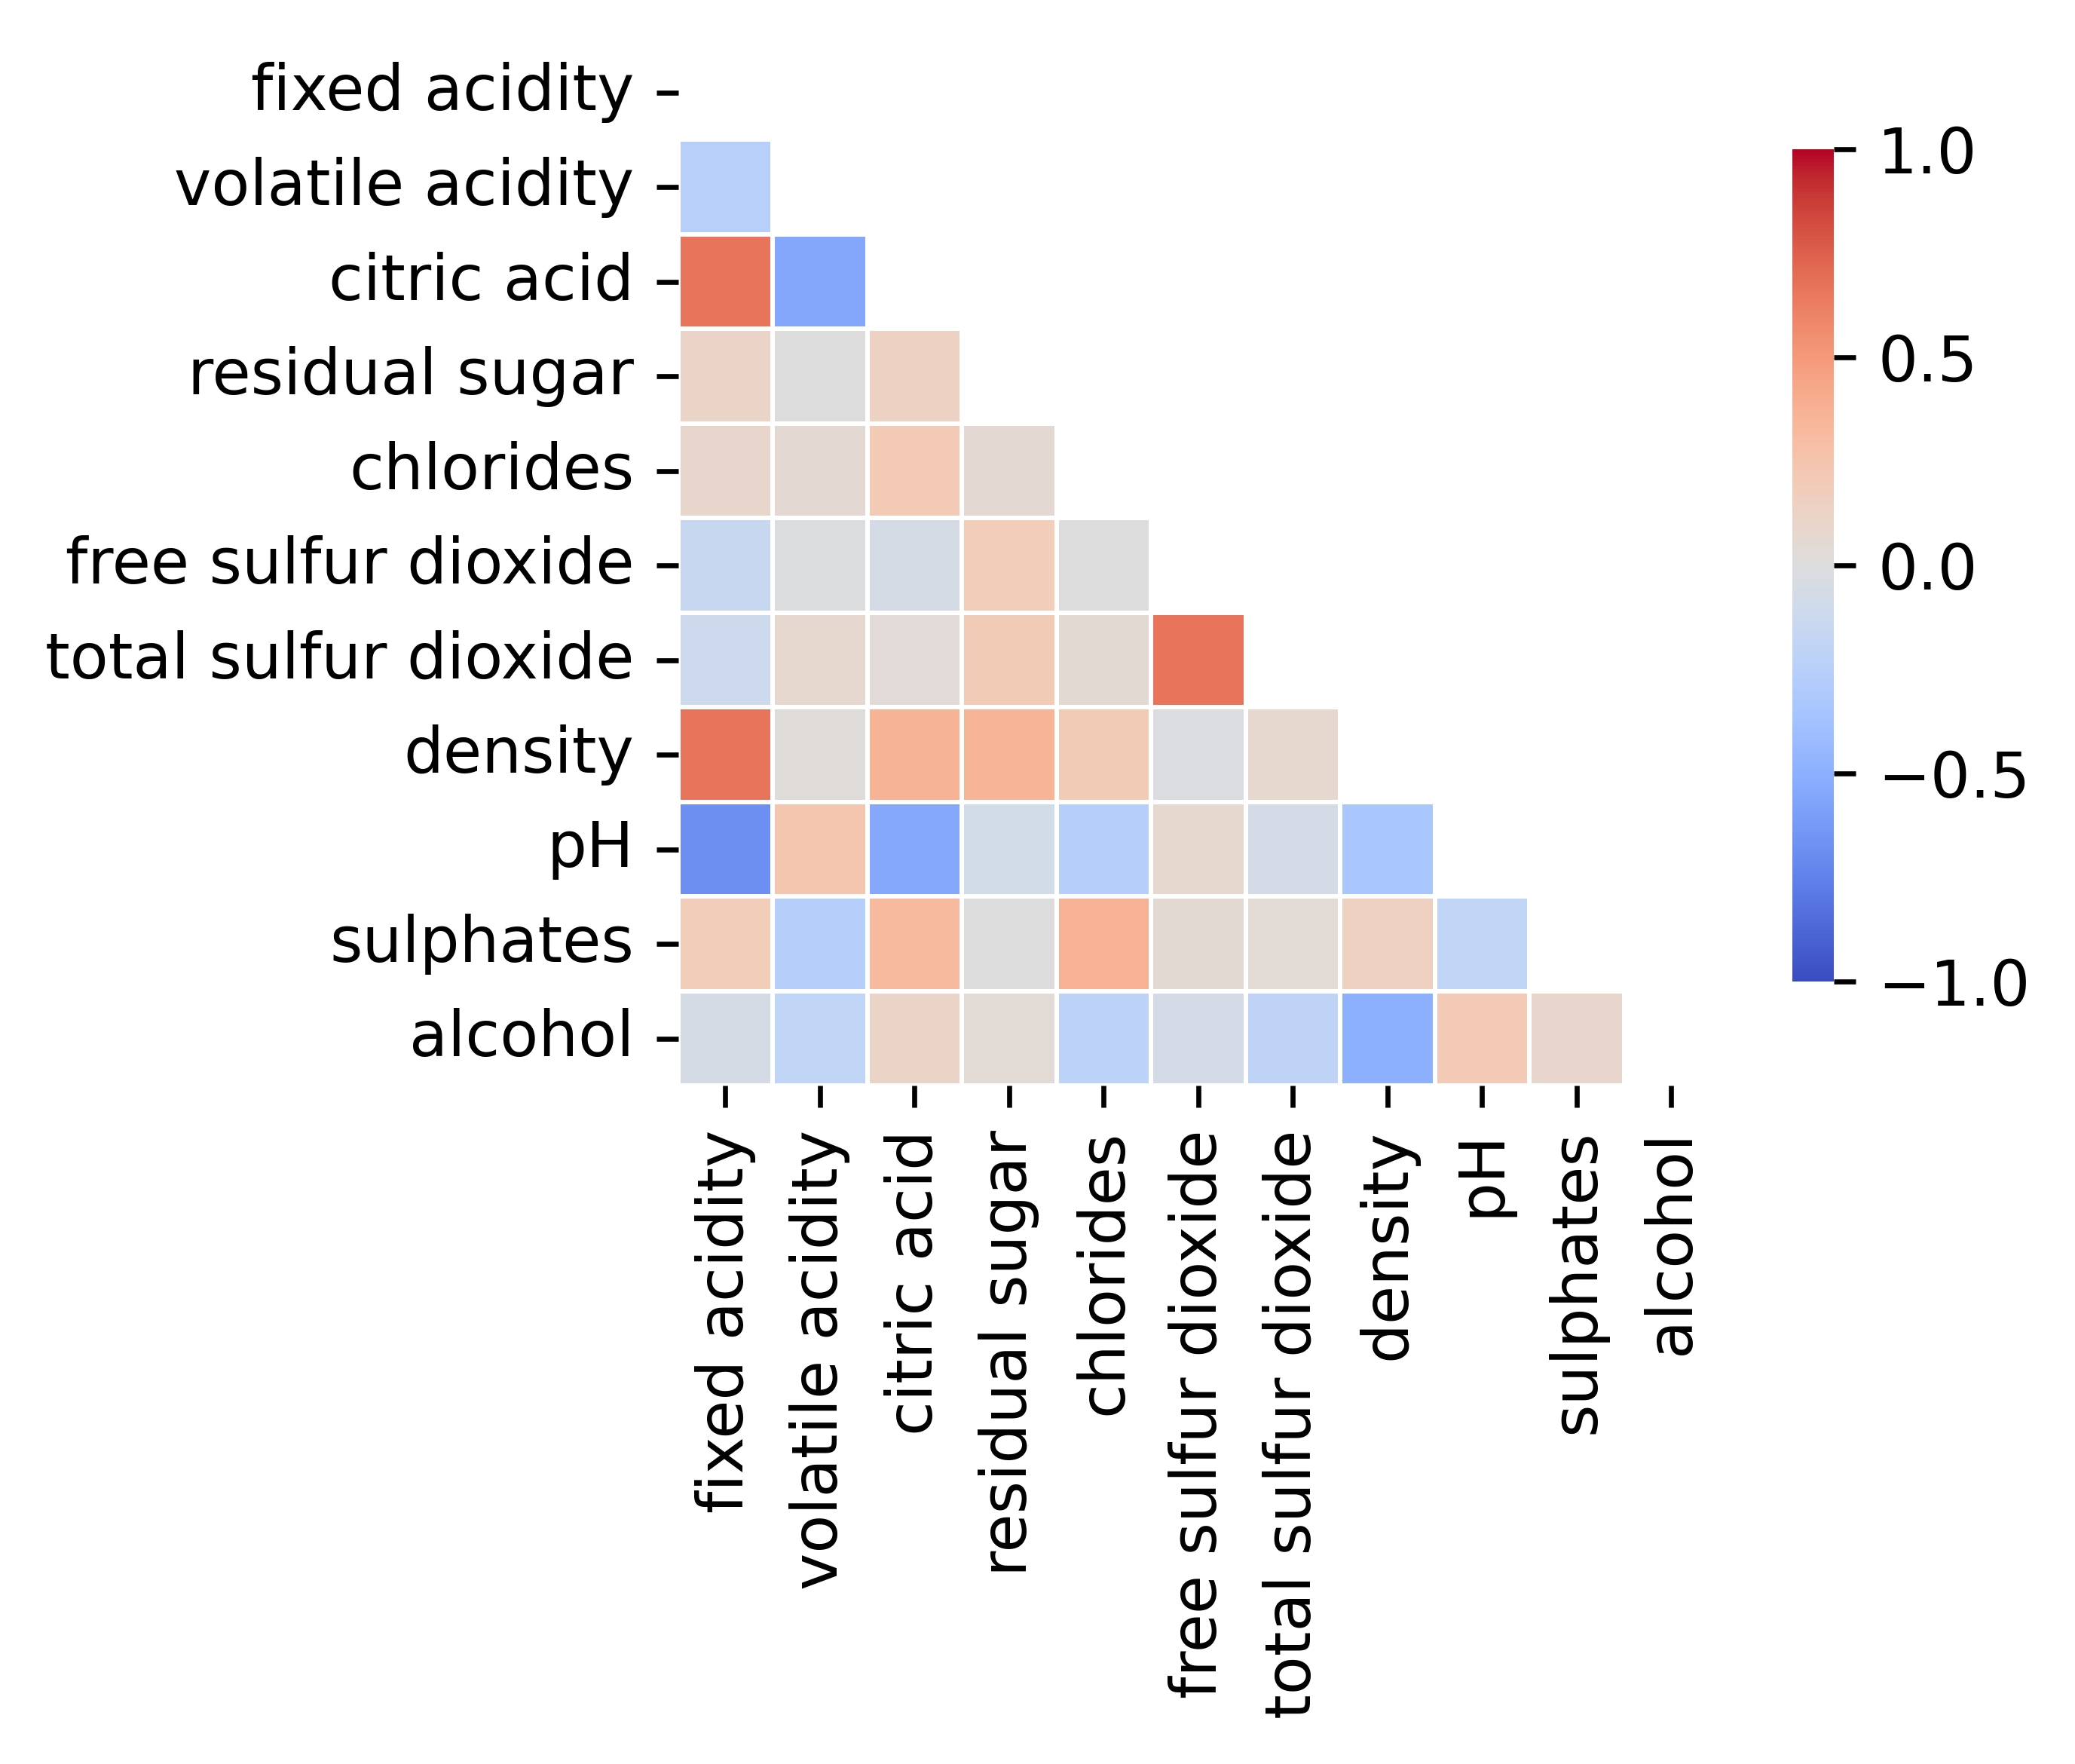

In [ ]:
corr = df.drop('quality', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(5, 4), dpi=600)
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.tight_layout()
plt.show()

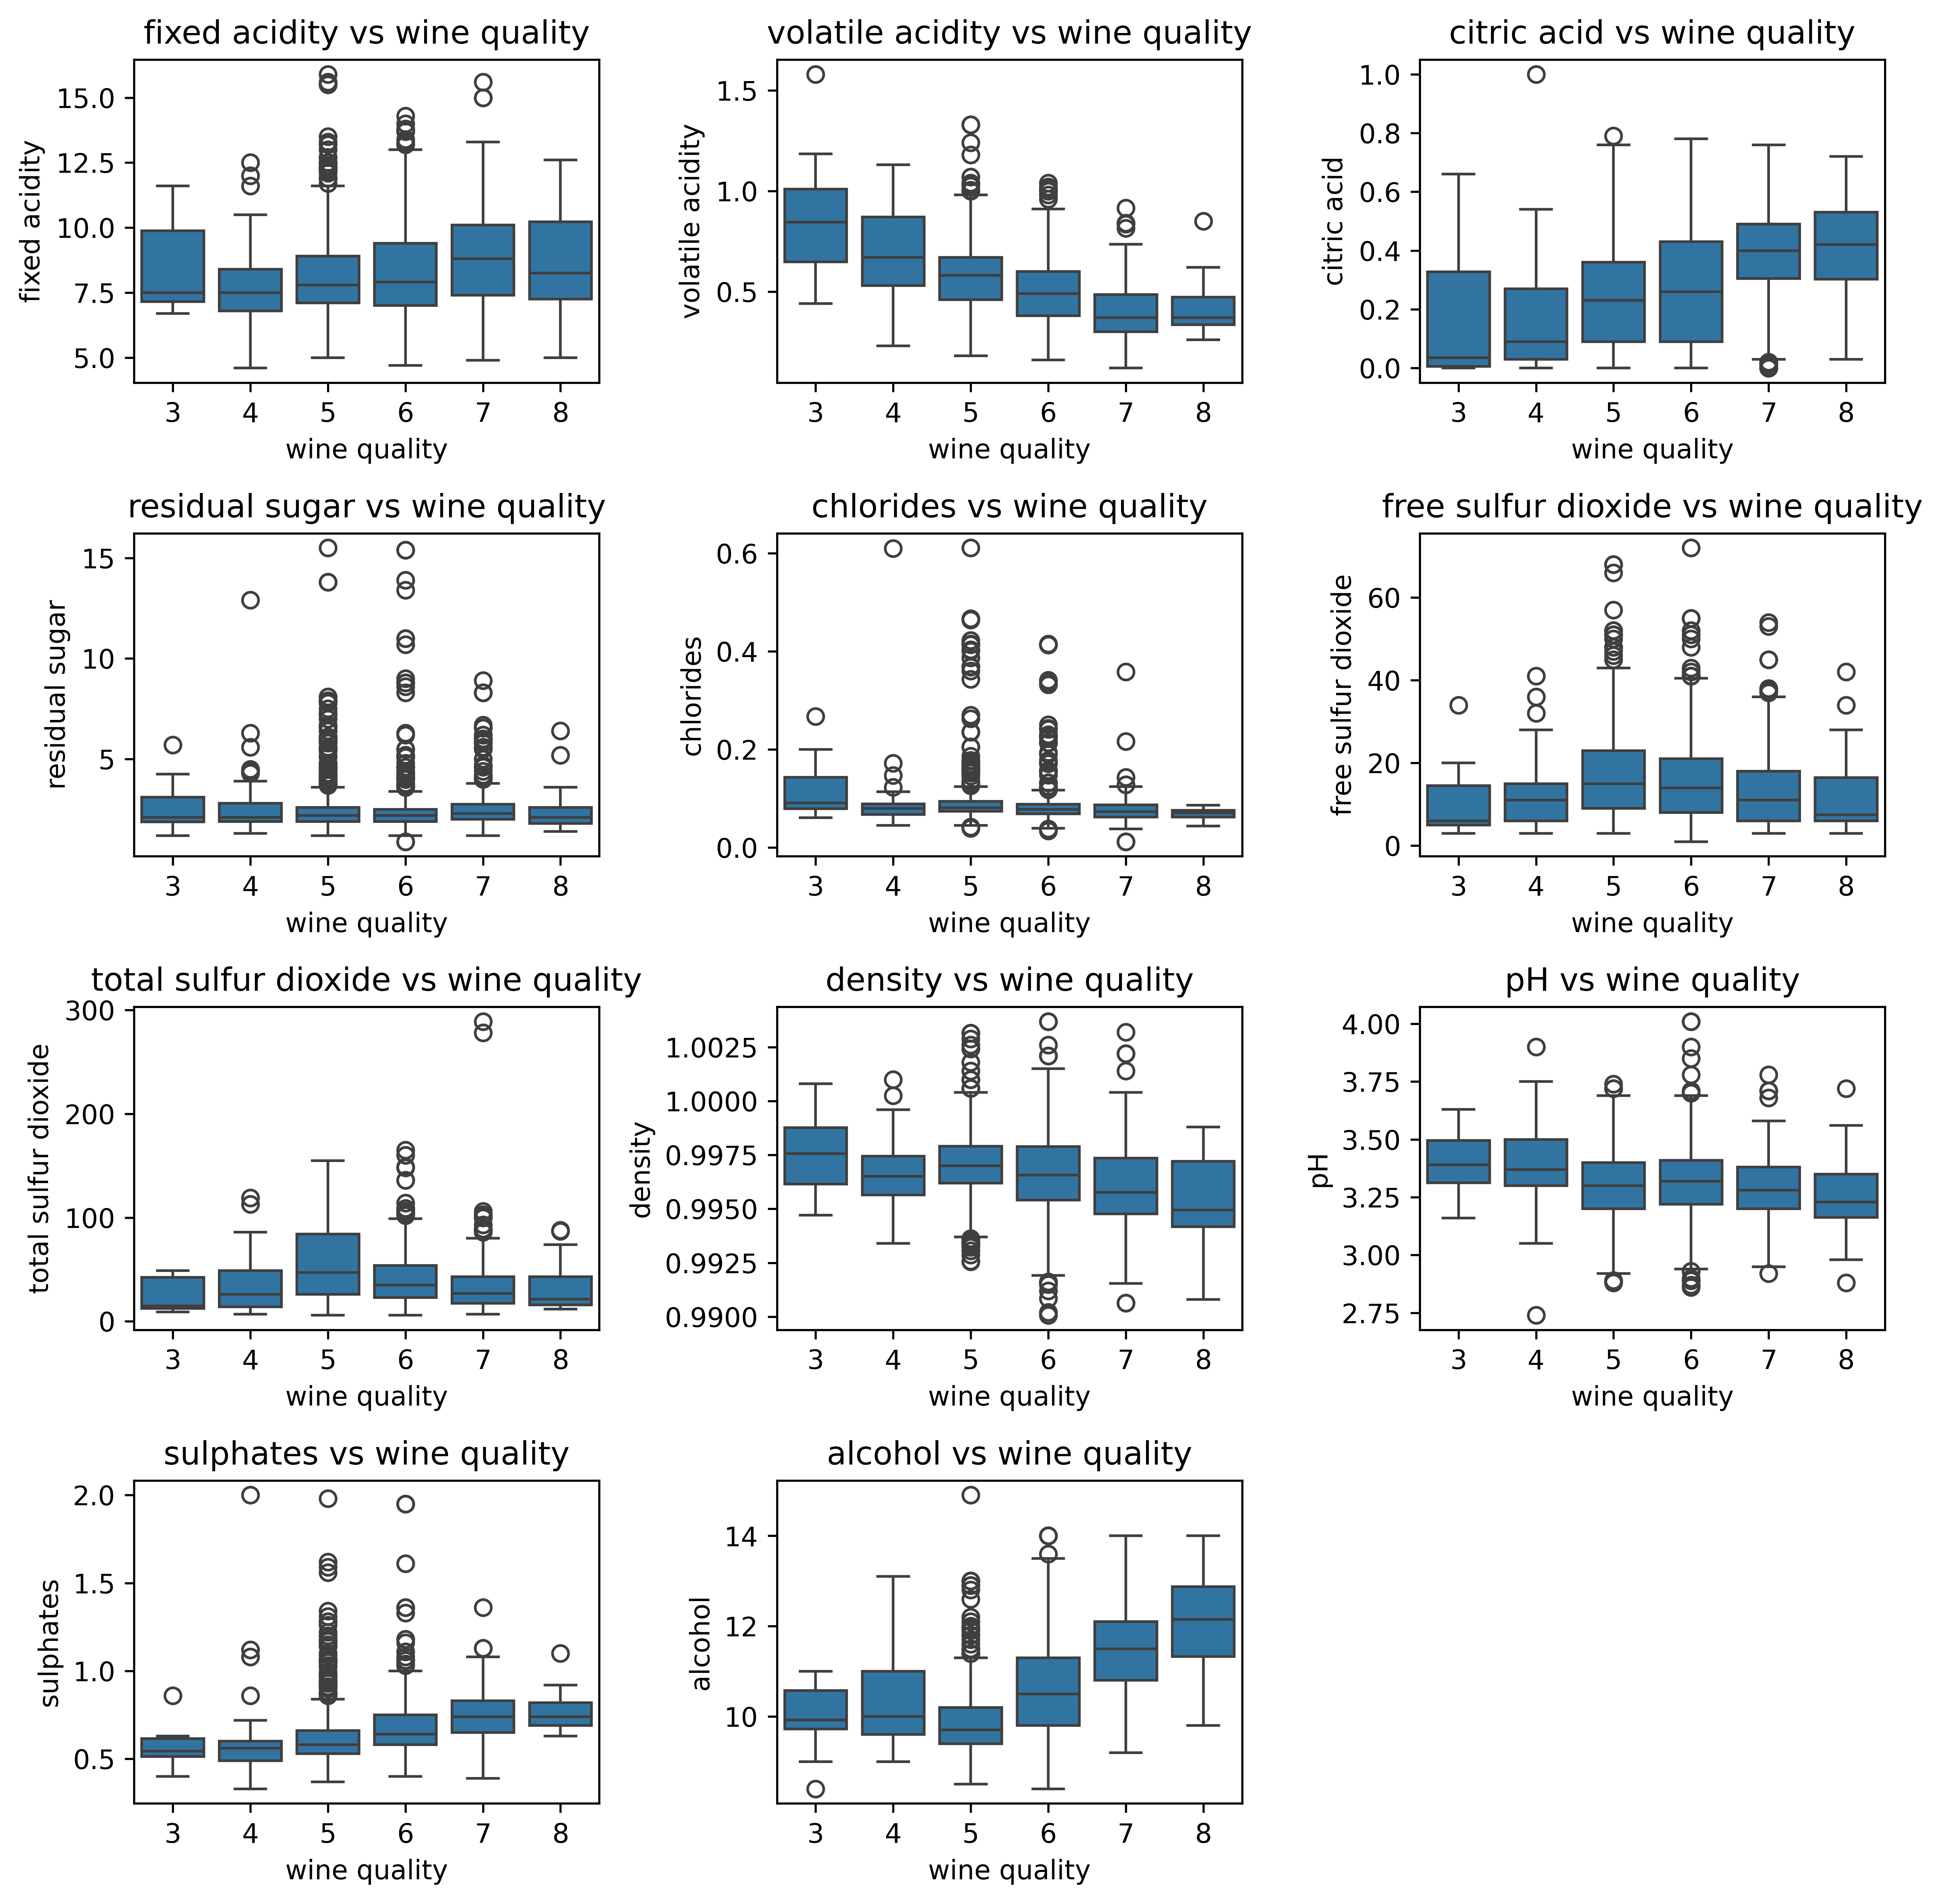

In [11]:
features = df.columns.drop("quality")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10), dpi=600)
axes = axes.flatten()
for i, col in enumerate(features):
    sns.boxplot(x=df["quality"], y=df[col], ax=axes[i])
    axes[i].set_title(f"{col} vs wine quality")
    axes[i].set_xlabel("wine quality")
    axes[i].set_ylabel(col)

axes[-1].axis('off')
plt.tight_layout()
plt.show()